In [5]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
model = ResNet50(include_top=True, weights='imagenet')
img_path = 'car/10.TIF'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

('Predicted:', [[(u'n04589890', u'window_screen', 0.091804311), (u'n04251144', u'snorkel', 0.072693937), (u'n07248320', u'book_jacket', 0.062894717), (u'n02445715', u'skunk', 0.023002144), (u'n02749479', u'assault_rifle', 0.022145452)]])


In [12]:
import numpy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# the number of images that will be processed in a single step
batch_size=32
# the size of the images that we'll learn on - we'll shrink them from the original size for speed
image_size=(224, 224)
train_generator = train_datagen.flow_from_directory(
    'resnet/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')
valid_generator = test_datagen.flow_from_directory(
    'resnet/valid',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)
test_generator = test_datagen.flow_from_directory(
    'resnet/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)
num_classes = len(train_generator.class_indices)

Found 21572 images belonging to 2 classes.
Found 5391 images belonging to 2 classes.
Found 6740 images belonging to 2 classes.


In [23]:
from keras.models import Model
def hack_resnet(input_size, num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_size)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax', name='fc1000')(x)
    # this is the model we will train
    newmodel = Model(inputs=base_model.input, outputs=x)
    return newmodel
model = hack_resnet(train_generator.image_shape, num_classes)

In [16]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
metrics=['accuracy'])

In [17]:
for layer in model.layers[:len(model.layers)-2]:
    layer.trainable = False

In [21]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.preprocessing import image
import numpy as np
model = ResNet50(include_top=False,
    weights='imagenet',
    pooling='avg')
img_path = 'resnet/test/car/2074.TIF'
img_path = 'resnet/test/no_car/16274.TIF'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)
print(features.shape)
print(features)

(1, 2048)
[[ 0.04455313  0.02506106  0.00717276 ...,  2.64335752  0.          0.        ]]


In [26]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
#model = ResNet50(include_top=True, weights='imagenet')
img_path = 'resnet/test/car/2074.TIF'
img_path = 'resnet/test/no_car/16274.TIF'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', preds)

('Predicted:', array([[ 0.00348833,  0.99651164]], dtype=float32))


/home/ii1n17/miniconda3/envs/one/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Found 21572 images belonging to 2 classes.


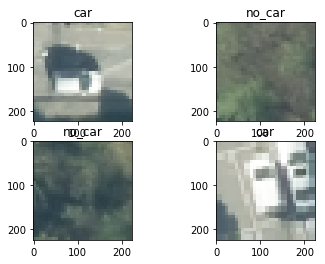

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory('resnet/train',
    target_size=(224, 224),
    batch_size=4,
    class_mode='categorical')
# generate the first batch
(batch_images, batch_labels) = generator.next()
class_labels = [item[0] for item in sorted(generator.class_indices.items(), key=lambda x: x[1])]
#get a list of classes
batch_labels = numpy.argmax(batch_labels, axis=1) 
#convert the one-hot labels to indices
# plot 4 images
plt.subplot(221).set_title(class_labels[batch_labels[0]])
plt.imshow(batch_images[0], aspect='equal')
plt.subplot(222).set_title(class_labels[batch_labels[1]])
plt.imshow(batch_images[1], aspect='equal')
plt.subplot(223).set_title(class_labels[batch_labels[2]])
plt.imshow(batch_images[2], aspect='equal')
plt.subplot(224).set_title(class_labels[batch_labels[3]])
plt.imshow(batch_images[3], aspect='equal')
# show the plot
plt.show()
plt.savefig("batch.png")

In [ ]:
# CNN from scratch 

In [11]:
import numpy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# the number of images that will be processed in a single step
batch_size=32
# the size of the images that we'll learn on - we'll shrink them from the original size for speed
image_size=(32, 32)

train_generator = train_datagen.flow_from_directory(
        'resnet/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = test_datagen.flow_from_directory(
        'resnet/valid',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'resnet/test',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

num_classes = len(train_generator.class_indices)

def larger_model(input_shape, num_classes):
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), padding='valid', input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# build the model
model = larger_model(train_generator.image_shape, num_classes)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit_generator(
        train_generator,
        steps_per_epoch=3474 // batch_size, 
        validation_data=valid_generator,
        validation_steps=395 // batch_size,
        epochs=10,
        verbose=1)

# Final evaluation of the model
test_steps_per_epoch = numpy.math.ceil(float(test_generator.samples) / test_generator.batch_size)
raw_predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predictions = numpy.argmax(raw_predictions, axis=1)

print("Prediction Distribution:  " + str(numpy.bincount(predictions)))
print("Groundtruth Distribution: " + str(numpy.bincount(test_generator.classes)))


Found 21572 images belonging to 2 classes.
Found 5391 images belonging to 2 classes.
Found 6740 images belonging to 2 classes.
Epoch 1/10
108/108 [==============================] - 4s 34ms/step - loss: 0.5107 - acc: 0.7786 - val_loss: 0.2177 - val_acc: 0.9010
Epoch 2/10
108/108 [==============================] - 3s 32ms/step - loss: 0.2623 - acc: 0.8935 - val_loss: 0.2885 - val_acc: 0.8828
Epoch 3/10
108/108 [==============================] - 3s 32ms/step - loss: 0.2296 - acc: 0.9002 - val_loss: 0.1000 - val_acc: 0.9922
Epoch 4/10
108/108 [==============================] - 3s 32ms/step - loss: 0.1872 - acc: 0.9178 - val_loss: 0.5962 - val_acc: 0.7344
Epoch 5/10
108/108 [==============================] - 3s 32ms/step - loss: 0.2101 - acc: 0.9106 - val_loss: 0.2482 - val_acc: 0.8958
Epoch 6/10
108/108 [==============================] - 3s 32ms/step - loss: 0.1785 - acc: 0.9216 - val_loss: 0.1879 - val_acc: 0.9323
Epoch 7/10
108/108 [==============================] - 3s 31ms/step - loss: 

In [9]:
from sklearn import metrics
class_labels = [item[0] for item in sorted(test_generator.class_indices.items(), key=lambda x: x[1])] 
#get a list of classes
print(metrics.classification_report(test_generator.classes, predictions, target_names=class_labels))

             precision    recall  f1-score   support

        car       0.81      0.96      0.88      1852
     no_car       0.98      0.91      0.95      4888

avg / total       0.93      0.93      0.93      6740



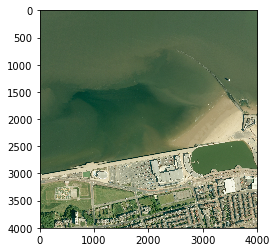

In [6]:
# lets do no this sliding window just to see where in the picture is the car located
# sliding window will go through the whole piture and we will see if this particular square contains the car or not
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
im = Image.open('images/SJ3094.TIF', 'r')
imshow(np.asarray(im))

In [8]:
# I will take picture half of which doesn`t even contain car (as it is sea )
# and I will check how many windows generated by sliding window contain car as an object 
size = 32
step = 16 
import os
if not os.path.exists('patches/'):
    os.makedirs('patches/')
width, height = im.size
for i in range(0,width-size,step):
    for j in range(0,height-size,step):
        area = (i, j, i+size, j+size)
        cropped_img = im.crop(area)
        cropped_img.save('patches/'+str(i)+'_'+str(j)+'.TIF')
#        imshow(np.asarray(cropped_img))\n"

In [9]:
import os
files = os.listdir('patches/')
print(len(files))

61504


In [43]:
# so we have 61 504 windows 
# what can I do now? 
# just check whether this window contain car or not. 
# simple, but hard. Let`s see if the CNN works
import os
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image as Image
from scipy import ndimage, misc
import numpy as np
# out = model.predict(self, x, batch_size=None, verbose=0, steps=None)
# load an image
#img_path = 'patches/384_2320.TIF'
img_path = 'car/7264.TIF'
img = Image.load_img(img_path, target_size=(32, 32))
x = Image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)


In [22]:
print('Predicted:', preds)

('Predicted:', array([[ 1.,  0.]], dtype=float32))


In [20]:
print(preds)

[[ 1.  0.]]


In [ ]:
import os
import numpy as np
from PIL import Image as im_open, ImageDraw
from keras.preprocessing import image as Image
from keras.applications.resnet50 import preprocess_input, decode_predictions
files = os.listdir('patches/')
im = im_open.open('images/SJ3094.TIF')
draw = ImageDraw.Draw(im)
k = 0
for el in files: 
    img_path = 'patches/'+el
    img = Image.load_img(img_path, target_size=(224, 224))
    x = Image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    if (preds[0][0]==1):
        k += 1
# that is car = draw it
        str1 = el 
        str2 = '_'
        str3 = '.TIF'
        k2 = str1.find(str2)
        k3 = str1.find(str3)
        i = int(str1[0:k2])
        j = int(str1[k2+1:k3])

        draw.rectangle([i, j, i+32, j+32], fill=128, outline=128)
        im.save('SJ3094_1.TIF')
    if k >400:
        del draw
        break 

In [26]:
k

14525

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im_open

fig1 = plt.figure(figsize = (15,15)) # create a figure with the default size 

#im1 = np.random.rand(5,5)
im1 = np.asarray(im_open.open('images/SJ3094.TIF'))
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(im1, interpolation='none')
ax1.set_title('without cars')

im2 = np.asarray(im_open.open('SJ3094_1.TIF'))
#im2 = im1
ax2 = fig1.add_subplot(2,2,2)
ax2.imshow(im2, interpolation='none')
ax2.set_title('with cars')

plt.show()
#fig1.savefig('example.png', dpi = 1000) # change the resolution of the saved image

In [3]:
# let`s implement resnet 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras import optimizers

# load data
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# the number of images that will be processed in a single step
batch_size=32
# the size of the images that we'll learn on - we'll use their natural size
image_size=(224, 224)

train_generator = train_datagen.flow_from_directory(
        'resnet/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = test_datagen.flow_from_directory(
        'resnet/valid',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'resnet/test',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

num_classes = len(train_generator.class_indices)

def hack_resnet(input_size, num_classes):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_size)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax', name='fc1000')(x)
    
    # this is the model we will train
    newmodel = Model(inputs=base_model.input, outputs=x)

    return newmodel

model = hack_resnet(train_generator.image_shape, num_classes)

# set weights in all but last layer
# to non-trainable (weights will not be updated)
for layer in model.layers[:len(model.layers)-2]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# Fit the model
model.fit_generator(
        train_generator,
        steps_per_epoch=3474 // batch_size, 
        validation_data=valid_generator,
        validation_steps=395 // batch_size,
        epochs=10,
        verbose=1)

# add the working time
# Final evaluation of the model
test_steps_per_epoch = numpy.math.ceil(float(test_generator.samples) / test_generator.batch_size)
raw_predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predictions = numpy.argmax(raw_predictions, axis=1)

print("Prediction Distribution:  " + str(numpy.bincount(predictions)))
print("Groundtruth Distribution: " + str(numpy.bincount(test_generator.classes)))

from sklearn import metrics
class_labels = [item[0] for item in sorted(test_generator.class_indices.items(), key=lambda x: x[1])] #get a list of classes
print(metrics.classification_report(test_generator.classes, predictions, target_names=class_labels))

Found 21572 images belonging to 2 classes.
Found 5391 images belonging to 2 classes.
Found 6740 images belonging to 2 classes.
Epoch 1/10
108/108 [==============================] - 774s 7s/step - loss: 0.1761 - acc: 0.9456 - val_loss: 1.1082 - val_acc: 0.6901
Epoch 2/10
108/108 [==============================] - 772s 7s/step - loss: 0.0828 - acc: 0.9731 - val_loss: 1.9428 - val_acc: 0.5495
Epoch 3/10
108/108 [==============================] - 766s 7s/step - loss: 0.0797 - acc: 0.9751 - val_loss: 2.2336 - val_acc: 0.4974
Epoch 4/10
108/108 [==============================] - 773s 7s/step - loss: 0.0712 - acc: 0.9800 - val_loss: 2.4752 - val_acc: 0.4635
Epoch 5/10
108/108 [==============================] - 772s 7s/step - loss: 0.0741 - acc: 0.9792 - val_loss: 2.2036 - val_acc: 0.5104
Epoch 6/10
108/108 [==============================] - 772s 7s/step - loss: 0.0468 - acc: 0.9850 - val_loss: 1.6780 - val_acc: 0.6042
Epoch 7/10
108/108 [==============================] - 763s 7s/step - loss: 

In [ ]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('model.pkl', 'w') as f:  # Python 3: open(..., 'wb')
    pickle.dump([model], f)
    
# Getting back the objects:
with open('objs.pkl') as f:  # Python 3: open(..., 'rb')
    ob = pickle.load(f)